# Sympy

Here we'll use the sympy libraries for the derivation of a complicate function

In [1]:
#import libraries
import numpy

from sympy import *
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

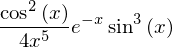

In [2]:
#sympy solution
init_printing()

x=symbols('x') #We create the sympy symbol 'x'
y=cos(x)**2*sin(x)**3/(4*x**5*exp(x)) #we use it to create the function we're interested in.
y #printing y

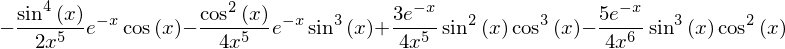

In [3]:
yprime=diff(y) #we take the derivative of the function
yprime #we display it

In [4]:
yprime_lamb = lambdify((x), yprime) #we lambdify yprime so we can evaluate it
yprime_lamb(2.2) #we evaluate it and print it

This answer is the one researched

# Traffic equation

Preliminary note. We're asked to work with a 11km road. After first calculations, we realised the "bump" in the cars' density leaves the analysed part of the road quite fast. We've decided to work with a longer road for an easier analysis when looking at graphs. We've answered the question on the website with a 11km road. This change affects not very interesting things like the average speed on the road (because we calculate based on a bigger number of cars). (Note that we still work with a constant dx step).

## Deriving the traffic equation

The whole simulation is defined by the equation of the $$V(\rho) = V_{max} (1-\frac{\rho}{\rho_max})$$
The rest simply follows from the the non-linear convection equation.
Asymptotically this link between velocity and density looks coherent even if it's just an approximation.

## Stability of the simulation

In this forward-time, backward-space simulation, we must verify that the CFL coefficient is smaller than one. In this simulation the convection speed is variable but bounded. By taking the maximal velocity, whe can check that :
$$\frac{V_{max} \Delta t}{\Delta x} = \frac{(80 or 135) 0.001}{11/51} = 0.37 or 0.63$$

This should ensure the stability of the solution.

In [5]:
#Traffic equation solution
#rho0 intial condition of the density on the road
#Vmax, maximal speed
#rhomax, maximal density
#T, Final time of the simulation
#dt Step in time
#dx Step in space
#rhoi rho(0, t)- boundary condition

def TrafEqSol(rho0, Vmax, rhomax, T, dt, dx, rhoi):
    #copying initial conditions
    u=rho0.copy()

    #solve numerically the equation
    for n in range (int(T/dt)):
        un= u.copy()
        u[1:]=un[1:]- dt/dx*Vmax*(1- 2*un[1:]/rhomax)*(un[1:]-un[0:-1])
        u[0] = rhoi
    return u

#Numerical function for homework
#Find the biggest element of a table
def findMax(u):
    mx = u[0]
    for i in range (0, len(u)-1):
        if mx<u[i]:
            mx = u[i]
    return mx
            

#Calculating the average value of elements of a table
def findAve(u):
    sumT = 0
    for i in range(0, len(u)-1):
        sumT = sumT + u[i]
    return sumT/(len(u)-1)
    
#sum a table 
def sumTable(u):
    sumT = 0
    for i in range(0, len(u)-1):
        sumT = sumT + u[i]
    return sumT

## Evaluation of the functions 

In [6]:
#Common intial condition in the homework. Units are km and hours
L = 20
rhomax=250
nx = int(L/11*51)
dt = 0.001

### Part A

Simulation with maximal speed 80km/h. rho(0,t) = 10. With the initial density as defined in the assignement. Solution will be calculated at times 0, 3 and 6 minutes.

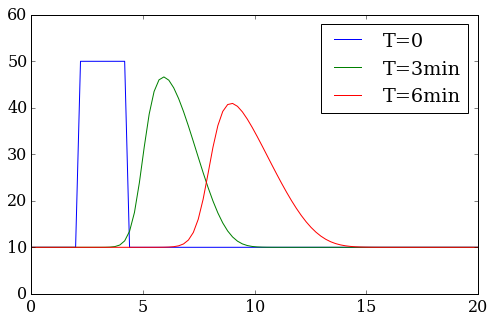

In [7]:
#Initial conditions (Used in part A of the assignement)
Vmax = 80
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10 
rho0[10:20] = 50
rhoi=10
dx=L/nx

#calculating solutions
u1=TrafEqSol(rho0, Vmax, rhomax, 0, dt, dx, rhoi)
u2=TrafEqSol(rho0, Vmax, rhomax, 0.05, dt, dx, rhoi)
u3=TrafEqSol(rho0, Vmax, rhomax, 0.1, dt, dx, rhoi)

        
#Let's plot the solution because we like graphs
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u1, label='T=0')
pyplot.plot(x,u2, label='T=3min')
pyplot.plot(x,u3, label='T=6min')
pyplot.xlim([0,20])
pyplot.ylim([0,60])
pyplot.legend();

The plot of the solution is the one we would have expected. The car are dispersing along the road. We would like to ensure that the  total number of car is constant as long as "the bump" in the density doesn't reach the end of the road. Let's check it at time t=3min. Normally, we should integrate the density over the length of the road. As we discretize, the integral becomes a sum. $$\sum \rho (x) dx  = constant $$


As the space step dx is constant, we find that the sum of densities along the road must remain constant.

In [8]:
nb_car_1 = sumTable(u1)
nb_car_2 = sumTable(u2)
nb_car_3 = sumTable(u3)
print(nb_car_1, nb_car_2, nb_car_3)

1310.0 1352.98469996 1369.90548438


The number of car is mostly conserved even though some have appeared. We have linked that to the imprecision inherent in numerical methods. Indeed, if we do the analytical calculation of 
$$\partial_t\int\rho dx = - \int \partial_t\rho dx = - \int \partial_\rho F * \partial_x \rho * dx = [F]_{x_0}^{x_f}$$
Thus the total number of cars should be constant if the flux of cars going in and out is the same.
The equation we have seems indeed to be consistent with the observation we can make in everyday life in first approximation.

Let's now find the values asked in the assignement :

In [9]:
#finding the smallest speed at time T = 0 (wich correspond to the highest density)
rho_max_1 = findMax(u1)#finding the highest density on the road at time T=0
V_min_1 = Vmax*(1-rho_max_1/rhomax)/3.6#printing it in m/s

#finding average speed at time t = 3min
V=numpy.zeros(nx) #creating a table st
V[:]=Vmax*(1-u2[:]/rhomax) #converting the density table in velocity table
V_av=findAve(V)/3.6#printing it in m/s

#finding the smallest speed at time T = 6min (wich correspond to the highest density)
rho_max_3 = findMax(u3)#finding the highest density on the road at time T=6min
V_min_3 = Vmax*(1-rho_max_3/rhomax)/3.6 #printing it in m/s

print(V_min_1)
print(V_av)
print(V_min_3)

17.7777777778
20.9006254457
18.5832164545


It's seems coherent that the minimum speed increases as the cars disperse along the road.

### Part B

We do the same for those new initial conditions. As you will see, the result are analoguous and don't need being mentioned.

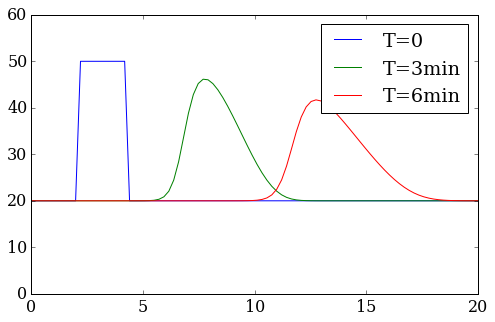

In [10]:
#Initial conditions (Used in part B of the assignement)
Vmax = 136
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*20 
rho0[10:20] = 50
rhoi=20
dx=L/nx

#calculating solutions
u1=TrafEqSol(rho0, Vmax, rhomax, 0, dt, dx, rhoi)
u2=TrafEqSol(rho0, Vmax, rhomax, 0.05, dt, dx, rhoi)
u3=TrafEqSol(rho0, Vmax, rhomax, 0.1, dt, dx, rhoi)

        
#Let's plot the solution because we like graphs
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u1, label='T=0')
pyplot.plot(x,u2, label='T=3min')
pyplot.plot(x,u3, label='T=6min')
pyplot.xlim([0,20])
pyplot.ylim([0,60])
pyplot.legend();

In [11]:
nb_car_1 = sumTable(u1)
nb_car_2 = sumTable(u2)
nb_car_3 = sumTable(u3)
print(nb_car_1, nb_car_2, nb_car_3)

2120.0 2156.98469375 2170.56160663


In [12]:
#finding the smallest speed at time T = 0 (wich correspond to the highest density)
rho_max_1 = findMax(u1)#finding the highest density on the road at time T=0
V_min_1 = Vmax*(1-rho_max_1/rhomax)/3.6#printing it in m/s

#finding average speed at time t = 3min
V=numpy.zeros(nx) #creating a table st
V[:]=Vmax*(1-u2[:]/rhomax) #converting the density table in velocity table
V_av=findAve(V)/3.6#printing it in m/s

#finding the smallest speed at time T = 6min (wich correspond to the highest density)
rho_max_3 = findMax(u3)#finding the highest density on the road at time T=6min
V_min_3 = Vmax*(1-rho_max_3/rhomax)/3.6 #printing it in m/s

print(V_min_1)
print(V_av)
print(V_min_3)

30.2222222222
34.1959716929
31.4754675993


### Conclusion

There is nothing new appearing in the second part. The simulation seems good even if cars are appearing (problem which could be solved by diminishing both space and time step paying attention to the CFL coefficient).

### Observed problem

We have noted a curious behaviour when the parameter rho_ is smaller than 2 times the maximal rho in the initial condition. Putting a rho_m = 90 (the maximal initial rho is 50) results in an explosion (a virtual one, not real).

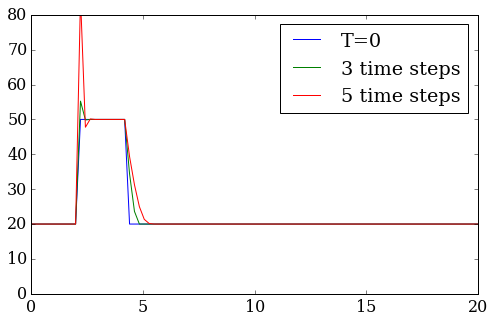

In [13]:
Vmax = 136
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*20 
rho0[10:20] = 50
rhoi=20
dx=L/nx
rhomax = 90

#calculating solutions
u1=TrafEqSol(rho0, Vmax, rhomax, 0, dt, dx, rhoi)
u2=TrafEqSol(rho0, Vmax, rhomax, 0.002, dt, dx, rhoi)
u3=TrafEqSol(rho0, Vmax, rhomax, 0.005, dt, dx, rhoi)

        
#Let's plot the solution because we like graphs
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u1, label='T=0')
pyplot.plot(x,u2, label='3 time steps')
pyplot.plot(x,u3, label='5 time steps')
pyplot.xlim([0,20])
pyplot.ylim([0,80])
pyplot.legend();

Something is happening at the beginning of our bump!! Physically, there should be no problem. The cars density is smaller than the maximal density, so everything should go smooth.
The problem lies in our calculations.
Look at the equation used in the simulation:
$$\rho(x,t+dt) = \rho(x,t) - \frac{dt}{dx} * Vm * (1-\frac{2\rho(x,t)}{\rho_m}) * (\rho(x,t) - \rho(x-dx,t))$$

The two last terms of the product are crucial to the understanding of this phenomenon (let's call them X and Y).Let's evaluate the function at the beginning of the bump. When the maximal density is smaller than 50, then the X term is negative. Since all other terms are positive, this results into an increase proportional to rho squared at the beginning of the bump. Each time-step gives a bigger increase.
The Y term tells us why is this happening at this place. rho(x-dx,t) is constant here and rho(x,t) is bigger. We see that the behaviour at the bump is more correct.
Maybe doing the forward-time,forward-space method would solve the problem?
No! We would observe the same problem, but at the end of the bump and when rho_max is bigger than 2*50=100.
This means we need to be very carefull about the choice of parameters and we need not only to know how to compute differential equations, but we need also an understanding on the behaviour of our equations.